In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

In [4]:
df = pd.read_csv("titanic3.csv")

In [5]:
y=df.Survived
X=df.drop(columns=['PassengerId','Survived',"Age","Fare"])

train_percentage = 0.75
train_size = int(train_percentage * len(X))
X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 666
Testing set size: 223


In [6]:
def print_scores(y_test,predictions_test):

    accuracy = accuracy_score(y_test, predictions_test)
    precision = precision_score(y_test, predictions_test)
    recall = recall_score(y_test, predictions_test)
    f1 = f1_score(y_test, predictions_test)

    accuracy = round(accuracy, 2)
    precision = round(precision, 2)
    recall = round(recall, 2)
    f1 = round(f1, 2)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

def Confusion_matrix(y_test,predictions_test):
    

    conf_matrix = confusion_matrix(y_test, predictions_test)
    print("Confusion Matrix:\n", conf_matrix)
    
    sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [7]:
import numpy as np

def calculate_distances(X_train, test_point):
    numeric_columns = X_train.select_dtypes(include=[np.number]).columns
    distances = [np.linalg.norm(X_train[numeric_columns].iloc[i].values - test_point) for i in range(len(X_train))]
    return distances

def calculate_distances_vectorized(X_train, test_point):
    numeric_columns = X_train.select_dtypes(include=[np.number])
    distances = np.linalg.norm(numeric_columns.values - test_point, axis=1)
    return distances


def sort_neighbors(distances, y_train):
    sorted_neighbors = sorted(zip(distances, y_train), key=lambda x: x[0])
    return sorted_neighbors


def select_k_neighbors(sorted_neighbors, k):
    k_nearest_neighbors = [neighbor[1] for neighbor in sorted_neighbors[:k]]
    return k_nearest_neighbors

def majority_vote(k_nearest_neighbors):
    unique_labels, counts = np.unique(k_nearest_neighbors, return_counts=True)
    majority_label = unique_labels[np.argmax(counts)]
    return majority_label

def KNN_predict(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test.values:

        distances = calculate_distances_vectorized(X_train, test_point)

        sorted_neighbors = sort_neighbors(distances, y_train.values)
        
        k_nearest_neighbors = select_k_neighbors(sorted_neighbors, k)
        
        predicted_label = majority_vote(k_nearest_neighbors)
        
        predictions.append(predicted_label)
        
    return predictions

In [10]:
def split_data(X,y,number):
    perc = 1/number 
    Xs = [] 
    ys = []
    size = len(X) 
    for i in range(number): 
        start = int(i*perc*size) 
        end = int((i+1)*perc*size) 
        Xs.append(X[start:end])
        ys.append(y[start:end])
    return Xs, ys 


def train_test_split(Xs,ys,percentage=0.75):
    X_train = [] 
    X_test = [] 
    y_train = [] 
    y_test = []
    for i in range(len(Xs)): 
        train_size = int(percentage* len(Xs[i]))
        X_train.append(Xs[i][:train_size]) 
        X_test.append(Xs[i][train_size:])
        y_train.append(ys[i][:train_size])
        y_test.append(ys[i][train_size:]) 
    return X_train, X_test, y_train, y_test

def ensemble_knn(X_train, X_test, y_train, y_test,k):
    predictions = []
    for i in range(len(X_test)):
        pred = KNN_predict(X_train[i], y_train[i], X_test[0], k)
        predictions.append(pred) 
    return predictions

def majority_voting(predictions):
    final_predictions = []
    for i in range(len(predictions[0])):
        same_index = [] 
        for pred in predictions:
            same_index.append(pred[i]) 
        unique_labels, counts = np.unique(same_index, return_counts=True) 
        majority_label = unique_labels[np.argmax(counts)] 
        final_predictions.append(majority_label)
    return final_predictions 


In [11]:
Xs,ys= split_data(X,y,3)

X_train, X_test, y_train, y_test = train_test_split(Xs,ys)

In [12]:
from sklearn.metrics import accuracy_score

k_values = range(1, 30)
accuracies = []

for k in k_values:
    predictions = ensemble_knn(X_train, X_test, y_train, y_test,k=k)
    
    final_pred= majority_voting(predictions)
    
    accuracy = accuracy_score(y_test[0], final_pred)
    print(f"K: {k}    Accuracy: {accuracy}")
    accuracies.append(accuracy)

sorted_accuracies = sorted(zip(k_values, accuracies), key=lambda x: x[1], reverse=True)

accuracies_df = pd.DataFrame(sorted_accuracies, columns=['K_value', 'Accuracy'])
best_k = accuracies_df.K_value[0]
print("-------------------------")
print(f"BEST K = {best_k}  ACCURACY : {accuracies_df.Accuracy[0]}")

K: 1    Accuracy: 0.7567567567567568
K: 2    Accuracy: 0.7162162162162162
K: 3    Accuracy: 0.7567567567567568
K: 4    Accuracy: 0.7567567567567568
K: 5    Accuracy: 0.7702702702702703
K: 6    Accuracy: 0.7702702702702703
K: 7    Accuracy: 0.7972972972972973
K: 8    Accuracy: 0.7972972972972973
K: 9    Accuracy: 0.7972972972972973
K: 10    Accuracy: 0.7972972972972973
K: 11    Accuracy: 0.7837837837837838
K: 12    Accuracy: 0.7837837837837838
K: 13    Accuracy: 0.7837837837837838
K: 14    Accuracy: 0.7837837837837838
K: 15    Accuracy: 0.7972972972972973
K: 16    Accuracy: 0.7972972972972973
K: 17    Accuracy: 0.8108108108108109
K: 18    Accuracy: 0.8108108108108109
K: 19    Accuracy: 0.8108108108108109
K: 20    Accuracy: 0.8108108108108109
K: 21    Accuracy: 0.8243243243243243
K: 22    Accuracy: 0.7972972972972973
K: 23    Accuracy: 0.7972972972972973
K: 24    Accuracy: 0.7972972972972973
K: 25    Accuracy: 0.7972972972972973
K: 26    Accuracy: 0.7972972972972973
K: 27    Accuracy: 0.

In [9]:

predictions = ensemble_knn(X_train, X_test, y_train, y_test,k=3)

final_pred= majority_voting(predictions)

Confusion Matrix:
 [[45  1]
 [12 16]]


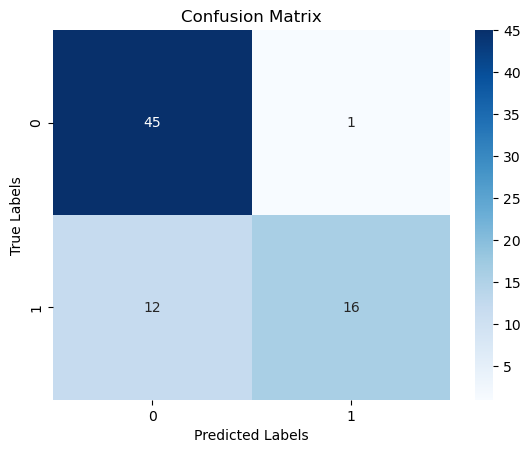

Accuracy: 0.82
Precision: 0.94
Recall: 0.57
F1 Score: 0.71


In [10]:
predictions = ensemble_knn(X_train, X_test, y_train, y_test,k=best_k)

final_pred= majority_voting(predictions)

Confusion_matrix(y_test[0],final_pred)
print_scores(y_test[0],final_pred)

# TYPE - 2 ERROR (FN)

In [11]:
y=df.Survived
X=df.drop(columns=['PassengerId','Survived',"Age","Fare"])

train_percentage = 0.75
train_size = int(train_percentage * len(X))
X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 666
Testing set size: 223


In [12]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=best_k)

voting = VotingClassifier(estimators=[("knn", knn)], voting="hard")

voting.fit(X_train, y_train)

predictions = voting.predict(X_test)


Confusion Matrix:
 [[123  19]
 [ 23  58]]


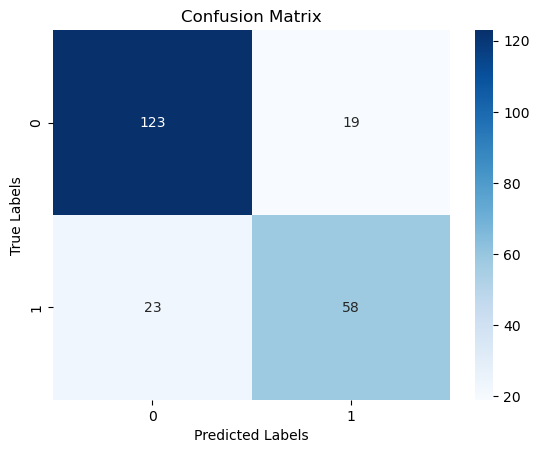

Accuracy: 0.81
Precision: 0.75
Recall: 0.72
F1 Score: 0.73


In [13]:
Confusion_matrix(y_test,predictions)
print_scores(y_test,predictions)

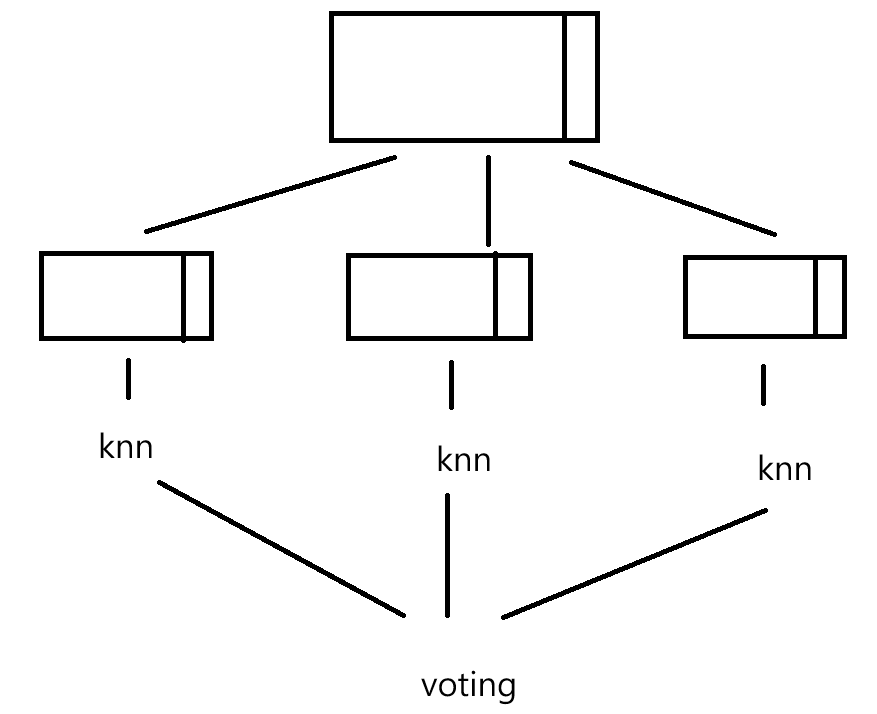